# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the notebook will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df['PHYSHLTH']

49938     88.0
49939     88.0
49940      2.0
49941     88.0
49942     88.0
          ... 
303774    88.0
303775    88.0
303776     6.0
303777    88.0
303778    88.0
Name: PHYSHLTH, Length: 34545, dtype: float64

In [5]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [49]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [6]:
pd.set_option('display.max_columns', 360)


In [7]:
# your code here
df[df['_STATE'].isin([9,34,36])]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now check to see how large our subset df.

In [60]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [8]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [9]:
#your code here
dict_ = {88: 0 ,77:np.nan, 99:np.nan }
df['PHYSHLTH'] = df['PHYSHLTH'].replace(dict_)

In [12]:
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [14]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

<AxesSubplot:>

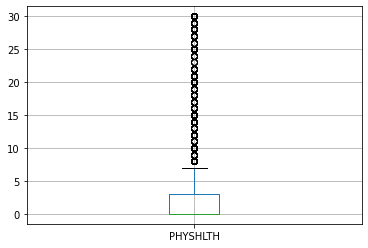

In [15]:
fig,ax = plt.subplots()
df.boxplot(column='PHYSHLTH')

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, '# of observations')

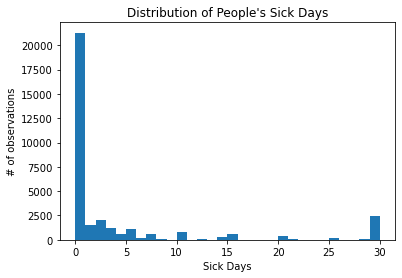

In [16]:
# graph the distribution of data
fig,ax = plt.subplots()
ax.hist(df['PHYSHLTH'],bins=30)

ax.set_title("Distribution of People's Sick Days")
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [18]:
# code to calculate the average number of sick days by state
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

<ipython-input-20-cfb74558c8c8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(states)


Text(0.5, 1.0, 'Comparing Health by State')

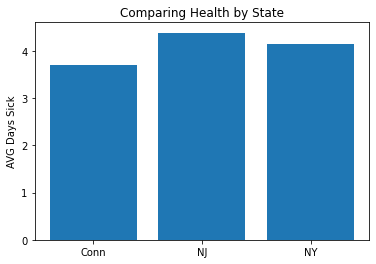

In [20]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn','NJ','NY']

fig, ax = plt.subplots()
ax.bar(states,means)

ax.set_xticklabels(states)
ax.set_ylabel('AVG Days Sick')
ax.set_title('Comparing Health by State')

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib

Text(0, 0.5, '# of observations')

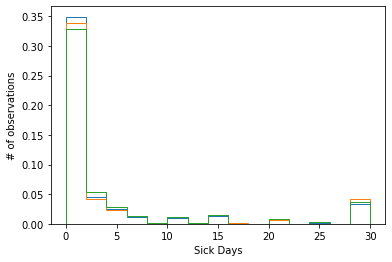

In [26]:
conn_df = df[df['_STATE'] == 9]['PHYSHLTH']
nj_df = df[df['_STATE'] == 34]['PHYSHLTH']
ny_df = df[df['_STATE'] == 36]['PHYSHLTH']

fig, ax = plt.subplots()
ax.hist(conn_df, label = 'Conn', histtype = 'step',density = True, bins = 15)
ax.hist(nj_df, label = 'NJ', histtype = 'step', density = True, bins = 15)
ax.hist(ny_df, label = 'NY', histtype = 'step', density = True, bins = 15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')

## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [34]:
# code to create new colum for chronically sick

df['chron'] = np.where(df['PHYSHLTH']>20, 1, 0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [35]:
df.groupby('_STATE')['chron'].mean()

_STATE
9.0     0.072252
34.0    0.092501
36.0    0.078619
Name: chron, dtype: float64

Text(0.5, 1.0, 'Comparing Health by State')

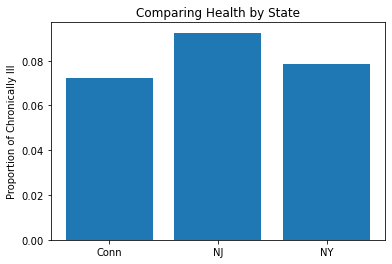

In [37]:
chron_means = df.groupby('_STATE')['chron'].mean().values

fig, ax = plt.subplots()
ax.bar(states, chron_means)

ax.set_ylabel('Proportion of Chronically Ill')
ax.set_title('Comparing Health by State')

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [38]:
# your code here
df['SMOKDAY2'].value_counts().sum()

13783

In [39]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])

In [40]:
df['smoking'].value_counts().sum()

32870

In [41]:
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])

In [43]:
df['smoking'].value_counts()

3.0    28790
1.0     2676
2.0     1371
7.0      180
9.0       78
Name: smoking, dtype: int64

In [51]:
choices = ['Every day', 'Some days', 'Non-Smokers', 'Don\'t Know', 'Refused']
conditions = [df['SMOKDAY2'] == 1.0, df['SMOKDAY2'] == 2.0,
              (df['SMOKDAY2'] == 3.0) | (df['SMOKE100'] == 2),
              (df['SMOKDAY2'] == 7.0) | (df['SMOKE100'] == 7.0),
              (df['SMOKDAY2'] == 9.0) | (df['SMOKE100'] == 9.0)]

df['DOSMOKE'] = np.select(conditions, choices, default = None)


Text(0.5, 1.0, 'Smoking Status')

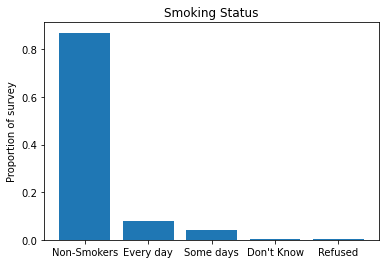

In [53]:
smokers_df = df['DOSMOKE'].value_counts(normalize = True)

fig, ax = plt.subplots()
ax.bar(smokers_df.index, smokers_df.values)

ax.set_ylabel('Proportion of survey')
ax.set_title('Smoking Status')

Text(0.5, 1.0, 'Smokers per State')

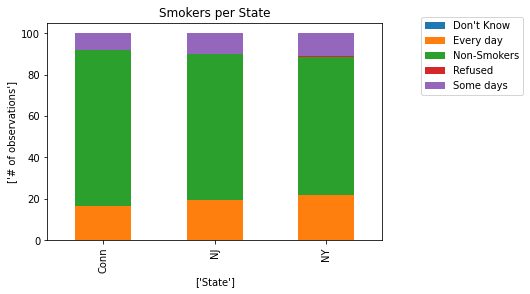

In [57]:
# your code here
df._STATE.replace([9,34,36],['Conn','NJ','NY'],inplace=True)
df.SMOKDAY2.replace([1,2,3,7,9],['Every day', 'Some days', 'Non-Smokers', 'Don\'t Know', 'Refused'],inplace=True)

x = df.groupby('_STATE')['SMOKDAY2'].value_counts(normalize=True).unstack()*100
fig, ax= plt.subplots()
x.plot.bar(stacked=True,ax=ax)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlabel(['State'])
ax.set_ylabel(['# of observations'])
ax.set_title('Smokers per State')


Text(0, 0.5, 'Days Sick')

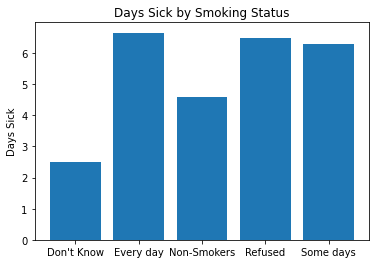

In [64]:
sick_smokers_df = df.groupby('SMOKDAY2').agg('mean')['PHYSHLTH']

fig, ax = plt.subplots()
ax.bar(sick_smokers_df.index,sick_smokers_df.values)

ax.set_title('Days Sick by Smoking Status')
ax.set_ylabel('Days Sick')

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [65]:
# code here to clean up the ALCDAY5 responses
alc_dict={888:0, 777:np.nan, 999: np.nan}
df['alcohol'] = df['ALCDAY5'].replace(alc_dict)

In [67]:
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min(int((x-100)*4.34524), 30)
    else:
        return x

In [69]:
df['alcohol'] = df['alcohol'].apply(calc_monthly)

In [70]:
df['alcohol'].describe()

count    32212.000000
mean         5.393735
std          8.375151
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of Days Drinking')

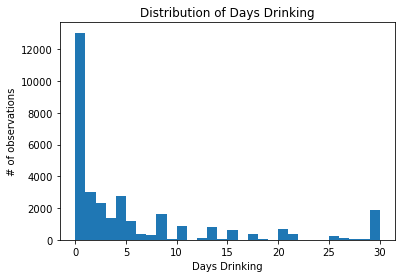

In [72]:
fig, ax = plt.subplots()
ax.hist(df['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title('Distribution of Days Drinking')

In [74]:
# code to calculate averages per state
df.groupby('_STATE')['alcohol'].mean()

_STATE
Conn    6.105832
NJ      4.979642
NY      5.174669
Name: alcohol, dtype: float64

Text(0.5, 1.0, 'Relationship between Drinking and Health')

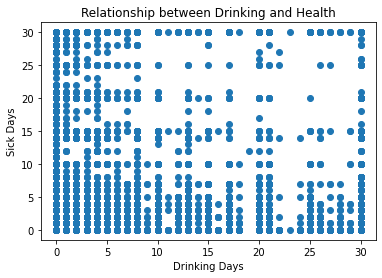

In [75]:
fig, ax = plt.subplots()
ax.scatter(df['alcohol'], df['PHYSHLTH'])

ax.set_xlabel('Drinking Days')
ax.set_ylabel('Sick Days')
ax.set_title('Relationship between Drinking and Health')

In [76]:
# Code to calculate correlation of between number of dirnks of number of days physically ill
df[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']


PHYSHLTH    1.000000
alcohol    -0.090125
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [89]:
ill_mean = df['PHYSHLTH'].mean()
ill_std = df['PHYSHLTH'].std()
ill_n = len(df['PHYSHLTH'])
ill_tval = st.t.ppf(.975, ill_n-1)
ill_margin_err = (ill_tval * ill_std) / (ill_n ** .5)
ill_ci = (ill_mean - ill_margin_err, ill_mean + ill_margin_err)
ill_ci_print = "With 95% confidence, the population mean of physically ill days falls between the intervals of " + str(ill_ci[0]) + " and " + str(ill_ci[1])
ill_ci_print


'With 95% confidence, the population mean of physically ill days falls between the intervals of 3.9955632610398144 and 4.17511857734582'

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [91]:
chron_mean = df['chron'].mean()
chron_std = df['chron'].std()
chron_n = len(df['chron'])
chron_tval = st.t.ppf(.975, ill_n-1)
chron_margin_err = (chron_tval * chron_std) / (chron_n ** .5)
chron_ci = (chron_mean - chron_margin_err, chron_mean + chron_margin_err)
chron_ci_print = "With 95% confidence, the true proportion of chronically ill people falls between the intervals of " + str(chron_ci[0]) + " and " + str(chron_ci[1])
chron_ci_print


'With 95% confidence, the true proportion of chronically ill people falls between the intervals of 0.07848885785179471 and 0.08425538878302943'

___

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic against the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

## 9. Hypothesis Tests 

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. Based on the sample, assess whether or not the population mean is 4.
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


In [149]:
ill_null = 'H0: The population mean is not 4.'
ill_alt = 'H1: The population mean is 4.'

# two tailed T-test for one sample
ill_1samp_t_test = st.ttest_1samp(df['PHYSHLTH'], 4, nan_policy='omit')

# critical value
ill_1samp_crit_val = st.t.ppf((1-.05), len(df['PHYSHLTH'])-1)

#conclusion
ill_1samp_conclusion = 'Because the critical value of ' + str(ill_1samp_crit_val) +' is less than the test statistic of 1.8415238127150806, we reject the null hypothesis.'
ill_1samp_conclusion

'Because the critical value of 1.6448987822656875 is less than the test statistic of 1.8415238127150806, we reject the null hypothesis.'

In [150]:
ill_1samp_crit_val

1.6448987822656875

In [160]:
ill_2samp_null = 'H0: There is no statistically significant difference between men and women in the number of days a person feels physically ill.'
ill_2samp_alt = 'H1: There is a statistically significant difference between men and women in the number of days a person feels physically ill.'

male = df[df['SEX']==1]['PHYSHLTH']
female = df[df['SEX']==2]['PHYSHLTH']

#two tailed independent T-test
ill_2samp_t_test = st.ttest_ind(male, female, equal_var=False, nan_policy='omit')

ill_2samp_crit_val = st.t.ppf(1-(.05/2), df=len(male)+len(female)-2)                              

ill_2samp_conclusion = 'Because the p-value of 1.5678716840649615e-13 is less than the alpha of 0.05, we fail to reject the null hypthesis.'
ill_2samp_conclusion

'Because the p-value of 1.5678716840649615e-13 is less than the alpha of 0.05, we fail to reject the null hypthesis.'

In [146]:
ill_anova_null = 'H0: There is no statistically significant difference in the physical health of people from the three states.'
ill_anova_alt = 'H1: There is a statistically significant difference in the physical health of people from the three states.' 

conn_health = df[df['_STATE']=='Conn']['PHYSHLTH']
nj_health = df[df['_STATE']=='NJ']['PHYSHLTH']
ny_health = df[df['_STATE']=='NY']['PHYSHLTH']

df.dropna(subset=['PHYSHLTH'], inplace=True)

#anova test
ill_anova_test = st.f_oneway(conn_health, nj_health, ny_health)

ill_anova_conclusion = 'Because the p-value of 8.800607044147037e-09 is less than the alpha of 0.05, we fail to reject the null hypthesis.'
ill_anova_conclusion


'Because the p-value of 8.800607044147037e-09 is less than the alpha of 0.05, we fail to reject the null hypthesis.'

### 9.B The following questions are regarding the  `CHRONIC` variable.
1. Based on the sample, asses if true population proportion of chronically sick people is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

In [167]:
chron_null = 'H0: The true population proportion of chronically sick people is not 0.10.'
chron_alt = 'H1: The true population proportion of chronically sick people is 0.10.'

# 1 sample z prop test
p0 = df['chron'].mean()
st_error = ((p0 * (1-p0))/ len(df['chron']))**.5
z_stat = (.10 - p0) / st_error
z_stat

zcrit_val = st.norm.ppf(1-.05)
zprop_conclusion = 'Because the z-statistic is greater than the critical value, we fail to reject the null hypthesis.'



1.6448536269514722

In [221]:
nine_b2_null = 'H0: There is no statistically significant difference in the percentage of men and women who are chronicall sick.'
nine_b2_alt = 'H1: There is a statistically significant difference in the percentage of men and women who are chronicall sick.'

# 2 z prop test
male_chron = df[df['SEX']==1]['chron']
female_chron = df[df['SEX']==2]['chron']

sick_m = male_chron[male_chron==1]
sick_f = female_chron[female_chron==1]

p = (len(sick_m) + len(sick_f)) / (len(male_chron) + len(female_chron))
p_hat_male = len(sick_m)/len(male_chron)
p_hat_female = len(sick_f)/len(female_chron)
random = (1/(len(male_chron)) + (1/len(female_chron)))
numerator = p_hat_male - p_hat_female
denominator =  (p * (1-p) * random)**.5

#z statistic 
z_2samp = numerator / denominator

#crit val
zcrit_val1 = st.norm.ppf(1-.025)
zcrit_val2 = st.norm.ppf(1-.975)


z2sampprop_conclusion = 'Because the z-statistic is less than the critical value, we reject the null hypthesis.'


In [281]:
nineb3_null = 'H0: The proportion of chronically sick ppl in all states is equal to each other.'
nineb3_alt = 'H1: The proportion of chronically sick ppl in all states are not equal to each other.'

chronic_1 = df[df['chron']==1].groupby('_STATE').count()['chron'] #conn 743, nj 1051, ny 926
chronic_2 = df[df['chron']==0].groupby('_STATE').count()['chron'] #9552, 10260, 10756

cable = [	[743, 1051, 926],
			[9552, 10260, 10756]]
st, p, dof, expected = chi2_contingency(cable)
# print('dof=%d' % dof)
# print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)

# print('probability=%.3f, critical=%.3f, st=%.3f' % (prob, critical, st))
if abs(st) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')


Dependent (reject H0)


# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


In [241]:
#data cleaning for menthlth column
ment_dict = {88: 0 ,77:np.nan, 99:np.nan }
df['MENTHLTH'] = df['MENTHLTH'].replace(ment_dict)
# df['MENTHLTH'].value_counts()

**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

In [247]:
#1
ment_mean = df['MENTHLTH'].mean()
ment_std = df['MENTHLTH'].std()
#2
ment_n = len(df['MENTHLTH'])
ment_tval = st.t.ppf(.975, ment_n-1)
ment_margin_err = (ment_tval * ment_std) / (ment_n ** .5)
ment_ci = (ment_mean - ment_margin_err, ment_mean + ment_margin_err)
ment_ci_print = "With 95% confidence, the true population mean falls between the intervals of " + str(ment_ci[0]) + " and " + str(ment_ci[1])
ment_ci_print

'With 95% confidence, the true population mean falls between the intervals of 3.3696283587497287 and 3.534721557135876'

In [249]:
#3
ment_null = 'H0: There is no statistically significant difference between men and women in the number of days a person does not feel good mentally.'
ment_alt = 'H1: There is a statistically significant difference between men and women in the number of days a person does not feel good mentally.'

m = df[df['SEX']==1]['MENTHLTH']
f = df[df['SEX']==2]['MENTHLTH']

#two tailed independent T-test
ment_test = st.ttest_ind(m, f, equal_var=False, nan_policy='omit')

ment_crit_val = st.t.ppf(1-(.05/2), df=len(m)+len(f)-2)                              

ment_concl = 'Because the p-value is less than the alpha of 0.05, we reject the null hypthesis.'
ment_concl

'Because the p-value is less than the alpha of 0.05, we fail to reject the null hypthesis.'

In [251]:
df.dropna(subset=['MENTHLTH'], inplace=True)


In [254]:
#4
ment_anova_null = 'H0: There is no statistically significant difference in the mental health of people from the three states.'
ment_anova_alt = 'H1: There is a statistically significant difference in the mental health of people from the three states.' 

conn_ment = df[df['_STATE']=='Conn']['MENTHLTH']
nj_ment = df[df['_STATE']=='NJ']['MENTHLTH']
ny_ment = df[df['_STATE']=='NY']['MENTHLTH']

ment_anova_test = st.f_oneway(conn_ment, nj_ment, ny_ment)

ment_anova_conclusion = 'Because the p-value is less than the alpha of 0.05, we fail to reject the null hypthesis.'
ment_anova_conclusion


'Because the p-value is less than the alpha of 0.05, we fail to reject the null hypthesis.'

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.

In [256]:
# hlthpln1 data cleaning
plan_dict = {7:np.nan, 9:np.nan }
df['HLTHPLN1'] = df['HLTHPLN1'].replace(plan_dict)
df['HLTHPLN1'].value_counts()

1.0    31002
2.0     2197
Name: HLTHPLN1, dtype: int64

In [260]:
#1 
plan_mean = df['HLTHPLN1'].mean()
plan_std = df['HLTHPLN1'].std()
plan_n = len(df['HLTHPLN1'])
plan_tval = st.t.ppf(.975, plan_n-1)
plan_margin_err = (plan_tval * plan_std) / (plan_n ** .5)
plan_ci = (plan_mean - plan_margin_err, plan_mean + plan_margin_err)
plan_ci_print = "With 95% confidence, the true proportion of people who have a healthcare plan falls between the intervals of " + str(plan_ci[0]) + " and " + str(plan_ci[1])
plan_ci_print


'With 95% confidence, the true proportion of people who have a healthcare plan falls between the intervals of 1.0635060760206965 and 1.0688473081173802'

In [263]:
#2
plan_null = 'H0: There is no statistically significant difference in the percentage of men and women who have a healthcare plan.'
plan_alt = 'H1: There is a statistically significant difference in the percentage of men and women who have a healthcaare plan.'

# 2 z prop test
male_plan = df[df['SEX']==1]['HLTHPLN1']
female_plan = df[df['SEX']==2]['HLTHPLN1']

yesplan_m = male_chron[male_chron==1]
yesplan_f = female_chron[female_chron==1]

prob = (len(yesplan_m) + len(yesplan_f)) / (len(male_plan) + len(female_plan))
p_hat_plan_male = len(yesplan_m)/len(male_plan)
p_hat_plan_female = len(yesplan_f)/len(female_plan)
den = (1/(len(male_plan)) + (1/len(female_plan)))
num_plan = p_hat_plan_male - p_hat_plan_female
den_plan =  (prob * (1-prob) * den)**.5

#z statistic 
plan_z_2samp = num_plan / den_plan

#crit val
plan_zcrit_val1 = st.norm.ppf(1-.025)
plan_zcrit_val2 = st.norm.ppf(1-.975)

plan_z2sampprop_conclusion = 'Because the z-statistic is less than the critical value, we reject the null hypthesis.'
plan_z2sampprop_conclusion

'Because the z-statistic is less than the critical value, we reject the null hypthesis.'

In [285]:
#3
chiplan_null = 'H0: There is no statistically significant difference in proportion of people with health insurance from three states.'
chiplan_alt = 'H1: There is a statistically significant difference in proportion of people with health insurance from three states.'

plan_1 = df[df['HLTHPLN1']==1].groupby('_STATE').count()['HLTHPLN1'] #conn 9760, nj 10493, ny 10749
plan_2 = df[df['HLTHPLN1']==2].groupby('_STATE').count()['HLTHPLN1'] #500, 799, 898

pable = [	[9760, 10493, 10749],
			[500, 799, 898]]
st, p, dof, expected = chi2_contingency(pable)
# print('dof=%d' % dof)
# print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)

# print('probability=%.3f, critical=%.3f, st=%.3f' % (prob, critical, st))
if abs(st) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)
